In [1]:
#%matplotlib inline
#%matplotlib notebook

In [2]:
import cytoflow as flow
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import scipy.stats as stats
import scipy as sp
from scipy.stats.mstats import gmean
import scipy.optimize as opt
import numpy as np
from numpy import median
matplotlib.rc('figure', dpi = 160)

# Import samples and specify experimental condtions

sets the conditions of the tube

In [3]:
inputs = [
    ["20210630 TraR_Tube_001_001.fcs",0,0,'WT'],
    
    ["20210702 TraR rep2_Tube_002_001.fcs",1e-4,0,'TraR'],
    ["20210702 TraR rep2_Tube_003_002.fcs",1e-5,0,'TraR'],
    ["20210702 TraR rep2_Tube_004_003.fcs",1e-6,0,'TraR'],
    ["20210702 TraR rep2_Tube_005_004.fcs",1e-7,0,'TraR'],
    ["20210702 TraR rep2_Tube_006_005.fcs",1e-8,0,'TraR'],
    ["20210702 TraR rep2_Tube_007_006.fcs",1e-10,0,'TraR'],
    ["20210702 TraR rep2_Tube_008_007.fcs",1e-11,0,'TraR'],
    ["20210702 TraR rep2_Tube_009_008.fcs",0,0,'TraR'],
    
    ["20210702 TraR rep2_Tube_010_009.fcs",1e-4,0.005,'TraR'],
    ["20210702 TraR rep2_Tube_011_010.fcs",1e-5,0.005,'TraR'],
    ["20210702 TraR rep2_Tube_012_011.fcs",1e-6,0.005,'TraR'],
    ["20210702 TraR rep2_Tube_013_012.fcs",1e-7,0.005,'TraR'],
    ["20210702 TraR rep2_Tube_014_013.fcs",1e-8,0.005,'TraR'],
    ["20210702 TraR rep2_Tube_015_014.fcs",1e-10,0.005,'TraR'],
    ["20210702 TraR rep2_Tube_016_015.fcs",1e-11,0.005,'TraR'],
    ["20210702 TraR rep2_Tube_017_016.fcs",0,0.005,'TraR'],
    
    ["20210702 TraR rep2_Tube_018_017.fcs",1e-4,0.01,'TraR'],
    ["20210702 TraR rep2_Tube_019_018.fcs",1e-5,0.01,'TraR'],
    ["20210702 TraR rep2_Tube_020_019.fcs",1e-6,0.01,'TraR'],
    ["20210702 TraR rep2_Tube_021_020.fcs",1e-7,0.01,'TraR'],
    ["20210702 TraR rep2_Tube_022_021.fcs",1e-8,0.01,'TraR'],
    ["20210702 TraR rep2_Tube_023_022.fcs",1e-10,0.01,'TraR'],
    ["20210702 TraR rep2_Tube_024_023.fcs",1e-11,0.01,'TraR'],
    ["20210702 TraR rep2_Tube_025_024.fcs",0,0.01,'TraR'],
    
    ["20210702 TraR rep2_Tube_026_025.fcs",1e-4,0.05,'TraR'],
    ["20210702 TraR rep2_Tube_027_026.fcs",1e-5,0.05,'TraR'],
    ["20210702 TraR rep2_Tube_028_027.fcs",1e-6,0.05,'TraR'],
    ["20210702 TraR rep2_Tube_029_028.fcs",1e-7,0.05,'TraR'],
    ["20210702 TraR rep2_Tube_030_029.fcs",1e-8,0.05,'TraR'],
    ["20210702 TraR rep2_Tube_031_030.fcs",1e-10,0.05,'TraR'],
    ["20210702 TraR rep2_Tube_032_031.fcs",1e-11,0.05,'TraR'],
    ["20210702 TraR rep2_Tube_033_032.fcs",0,0.05,'TraR'],
    
    ["20210702 TraR rep2_Tube_034_033.fcs",1e-4,0.1,'TraR'],
    ["20210702 TraR rep2_Tube_035_034.fcs",1e-5,0.1,'TraR'],
    ["20210702 TraR rep2_Tube_036_035.fcs",1e-6,0.1,'TraR'],
    ["20210702 TraR rep2_Tube_037_036.fcs",1e-7,0.1,'TraR'],
    ["20210702 TraR rep2_Tube_038_037.fcs",1e-8,0.1,'TraR'],
    ["20210702 TraR rep2_Tube_039_038.fcs",1e-10,0.1,'TraR'],
    ["20210702 TraR rep2_Tube_040_039.fcs",1e-11,0.1,'TraR'],
    ["20210702 TraR rep2_Tube_041_040.fcs",0,0.1,'TraR'],
    
    ["20210702 TraR rep2_Tube_042_041.fcs",1e-4,0.5,'TraR'],
    ["20210702 TraR rep2_Tube_043_042.fcs",1e-5,0.5,'TraR'],
    ["20210702 TraR rep2_Tube_044_043.fcs",1e-6,0.5,'TraR'],
    ["20210702 TraR rep2_Tube_045_044.fcs",1e-7,0.5,'TraR'],
    ["20210702 TraR rep2_Tube_046_045.fcs",1e-8,0.5,'TraR'],
    ["20210702 TraR rep2_Tube_047_046.fcs",1e-10,0.5,'TraR'],
    ["20210702 TraR rep2_Tube_048_047.fcs",1e-11,0.5,'TraR'],
    ["20210702 TraR rep2_Tube_049_048.fcs",0,0.5,'TraR'],

   
    


]

       
tubes = []
for filename, ahl, iptg, family in inputs:
    tubes.append(flow.Tube(file = 'data/' + filename, conditions = {'AHL' : ahl, 'IPTG' : iptg, 'Family' : family}))
    
ex = flow.ImportOp(conditions = {'AHL' : 'float', 'IPTG' : 'float', 'Family' : 'str'},
                   tubes = tubes).apply()
       


In [4]:
flow.set_default_scale("log")

# Plot FITC-A histograms for all IPTG and AHL induction conditions

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10


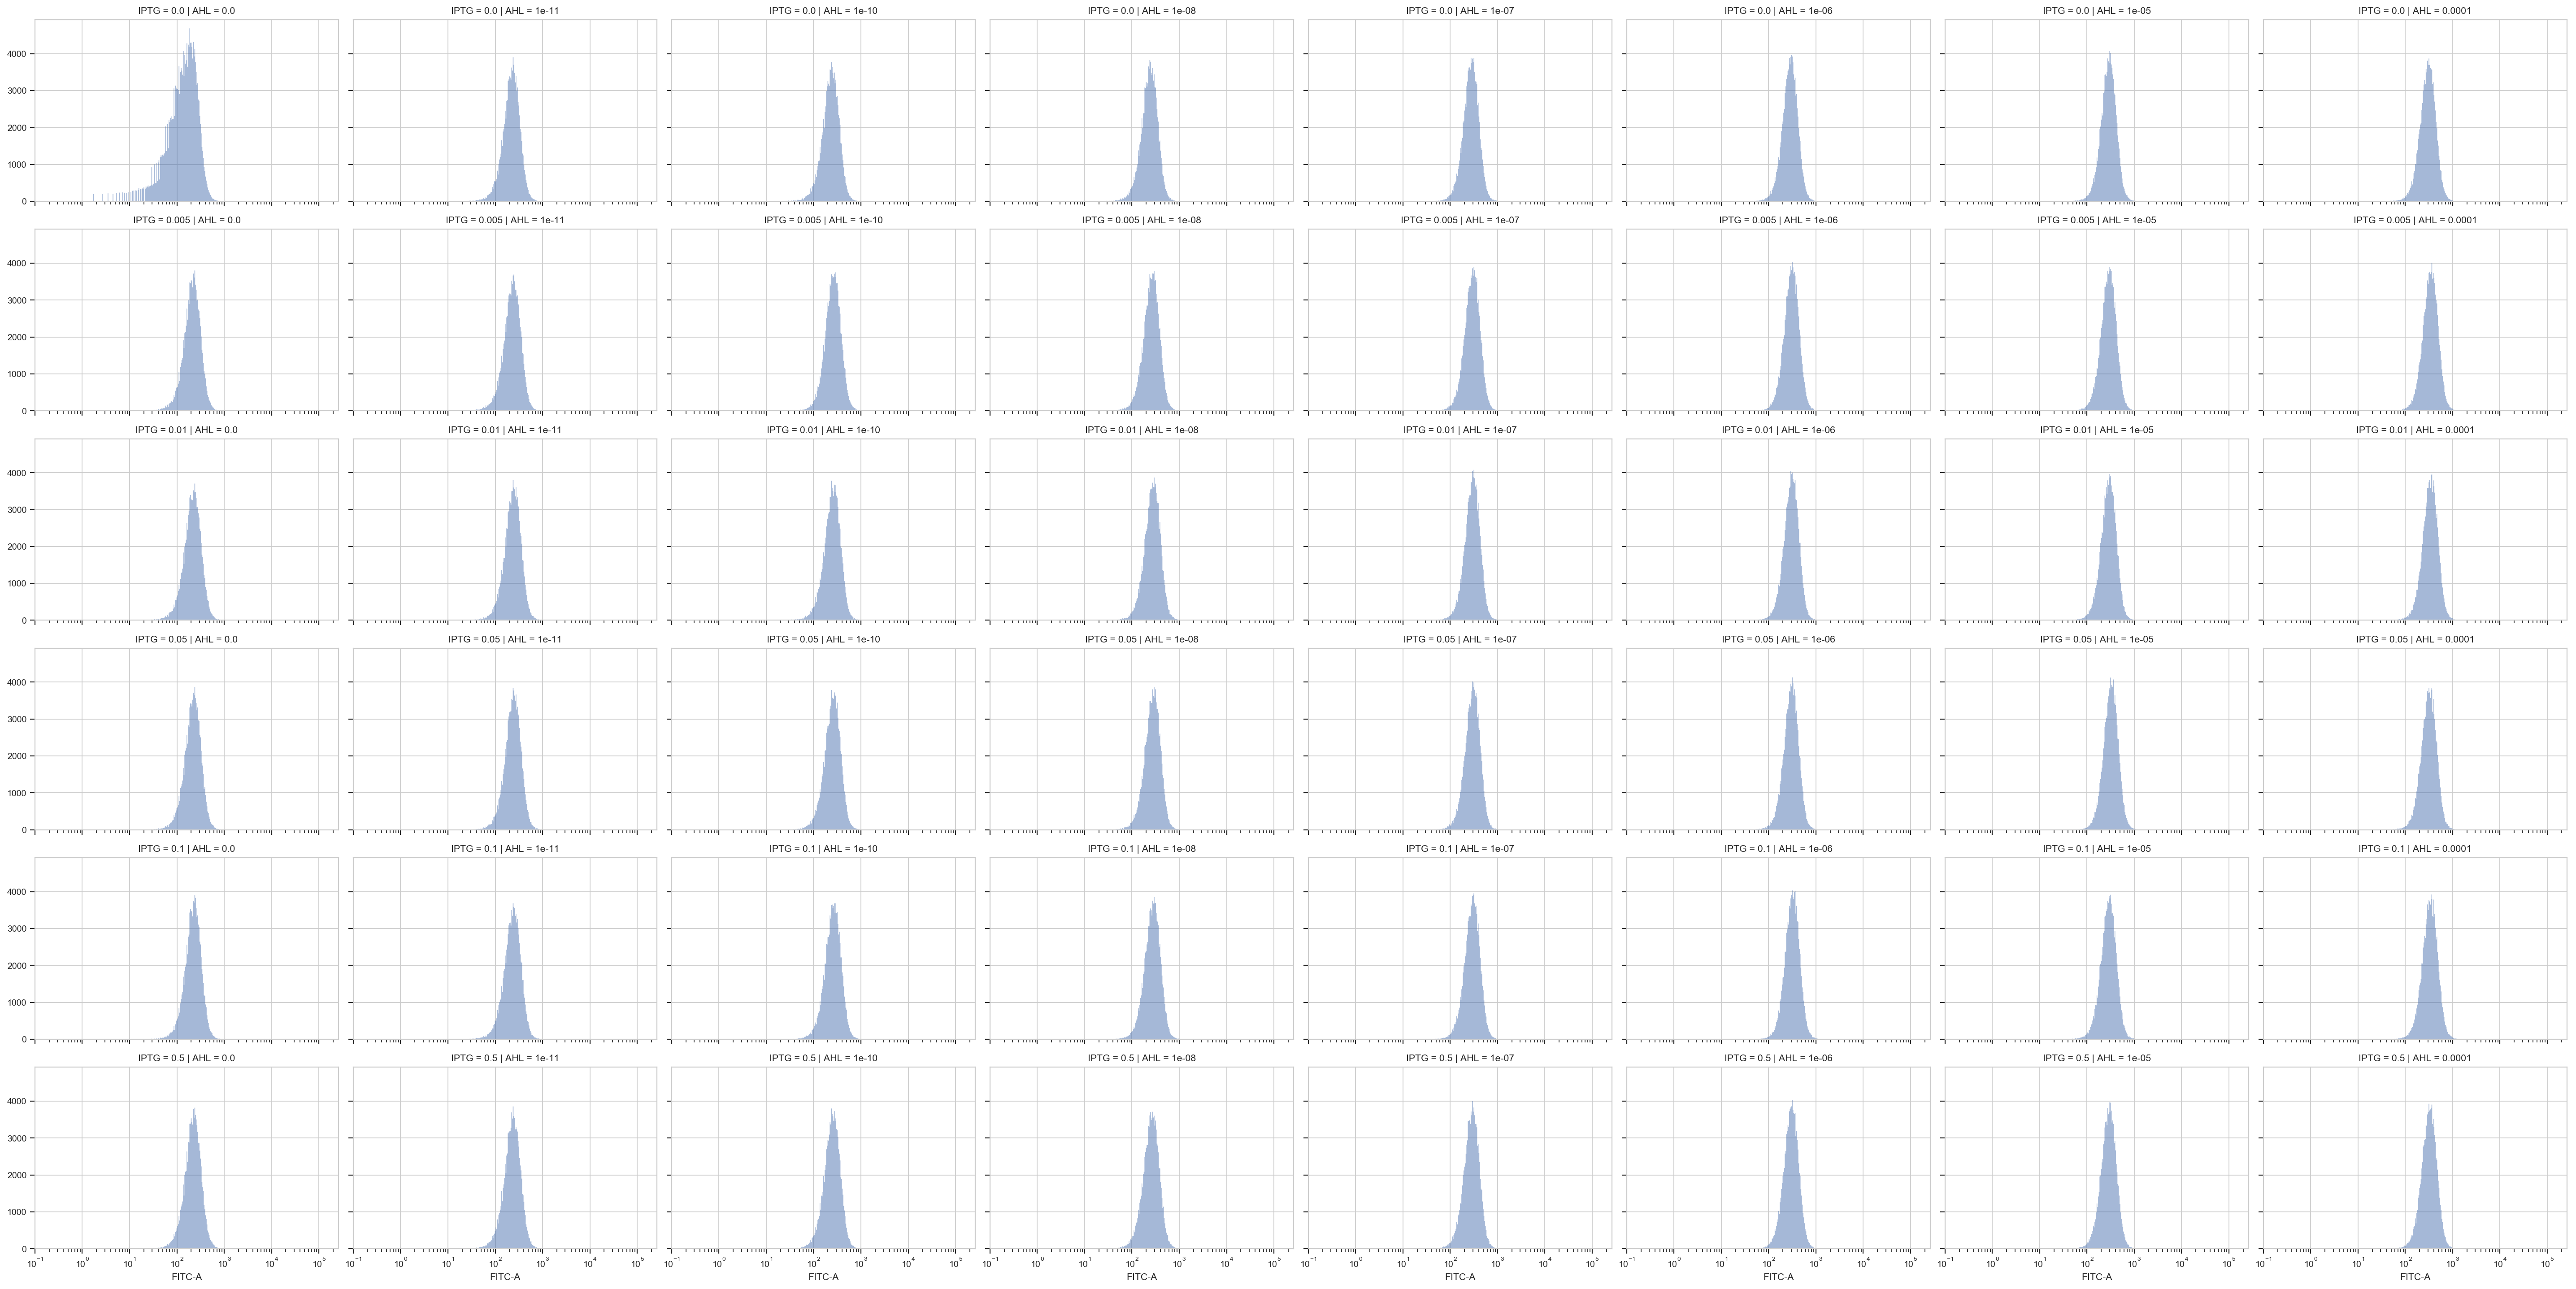

In [5]:

flow.HistogramView(channel = "FITC-A",
                   xfacet = "AHL",
                  yfacet = 'IPTG').plot(ex)

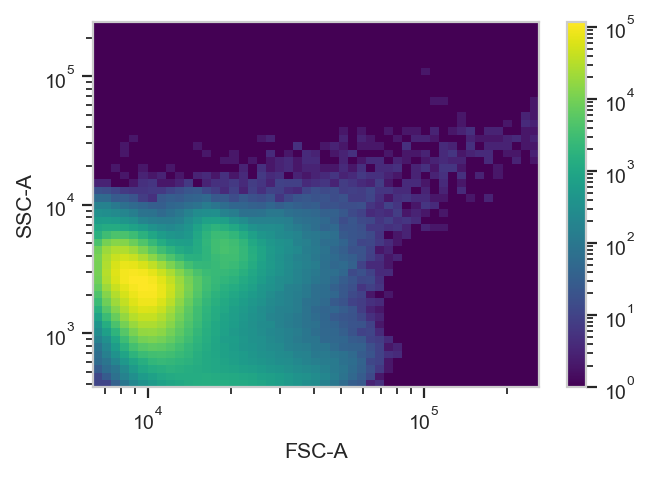

In [6]:
flow.DensityView(xchannel = "FSC-A", 
                 ychannel = "SSC-A",
                 xscale = 'log',
                 yscale = 'log').plot(ex, min_quantile = 0.005)

# Singlet gating to remove doublets

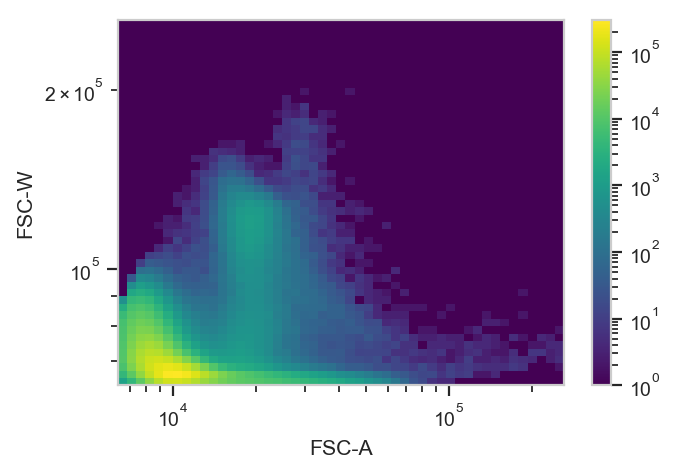

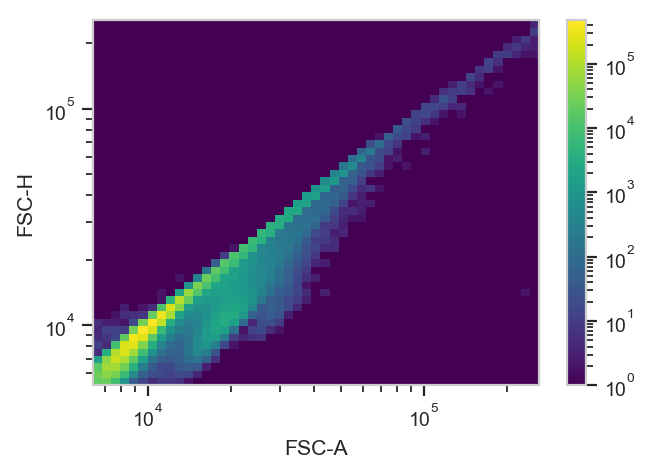

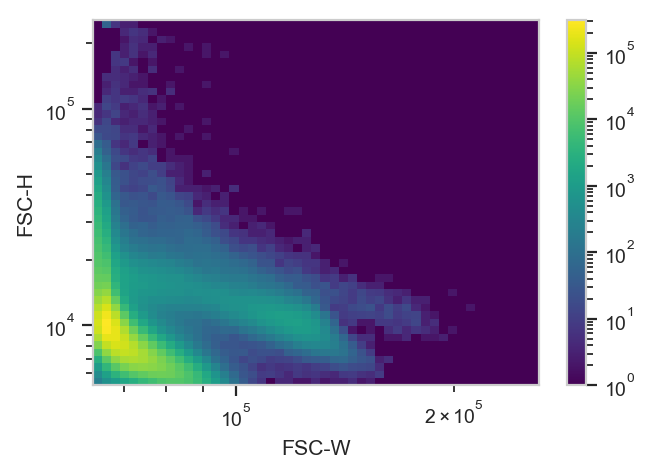

In [7]:

#channels = ['FSC-A','FSC-W','FSC-H','SSC-A','SSC-W','SSC-H']
#perm = combinations(channels,2)
FSC = [('FSC-A','FSC-W'),('FSC-A','FSC-H'),('FSC-W','FSC-H')]

#f, axes = plt.subplots(ncols=4,nrows=4)
#axs = axes.ravel()
for i,(x,y) in enumerate(FSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'log',
                yscale = 'log').plot(ex, min_quantile = 0.005)


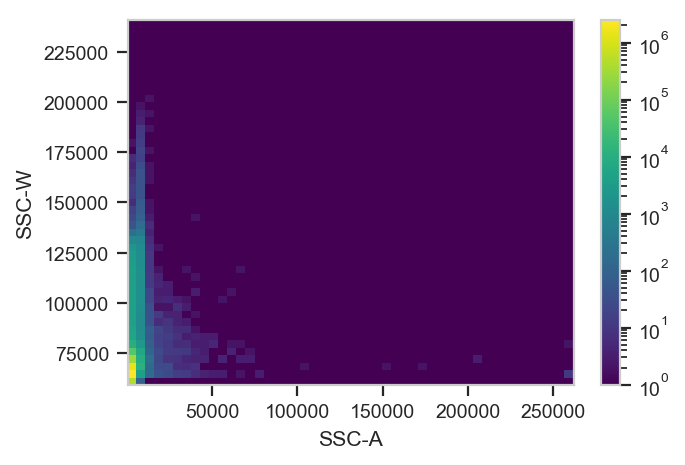

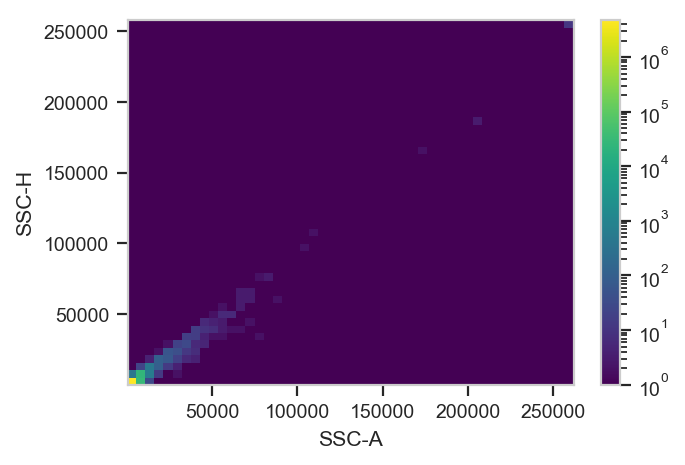

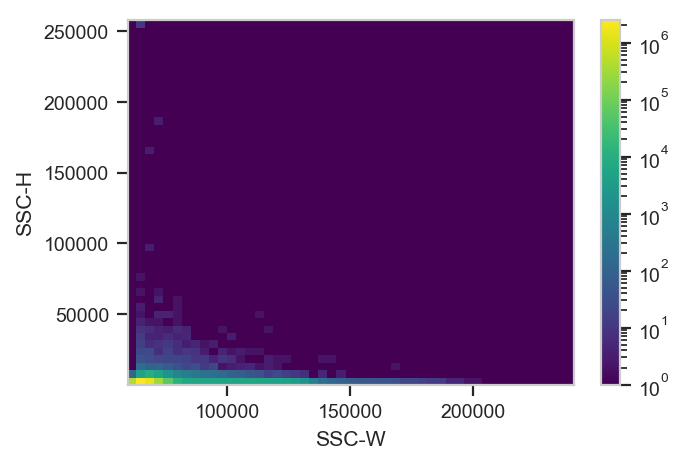

In [8]:
SSC = [('SSC-A','SSC-W'),('SSC-A','SSC-H'),('SSC-W','SSC-H')]
for i,(x,y) in enumerate(SSC):  
    flow.DensityView(xchannel = x, 
                ychannel = y,
                xscale = 'linear',
                yscale = 'linear').plot(ex, min_quantile = 0.005)

## Create and store singlet gate

saves the single data as ex2

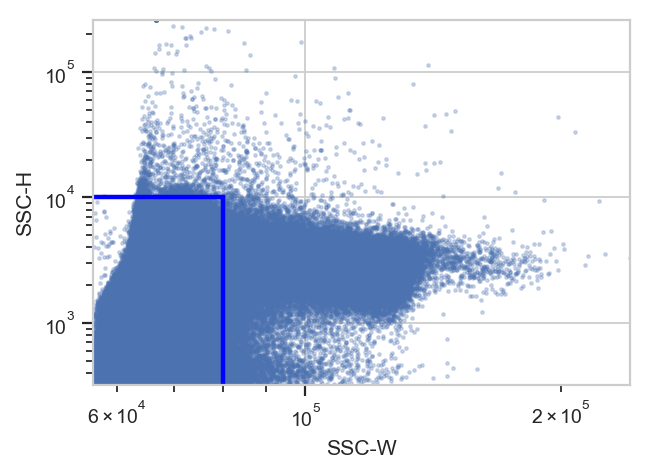

In [9]:
r = flow.Range2DOp(name = "Range2D",
                   xchannel = "SSC-W",
                   xlow = 55000,
                   xhigh = 80000,
                   ychannel = "SSC-H",
                   ylow = 100,
                   yhigh = 10000)
                   
rv = r.default_view(xscale ='log',yscale='log')

rv.plot(ex)
ex2 = r.apply(ex)

## Use a gaussian mixture model to further gate the population

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM_1'


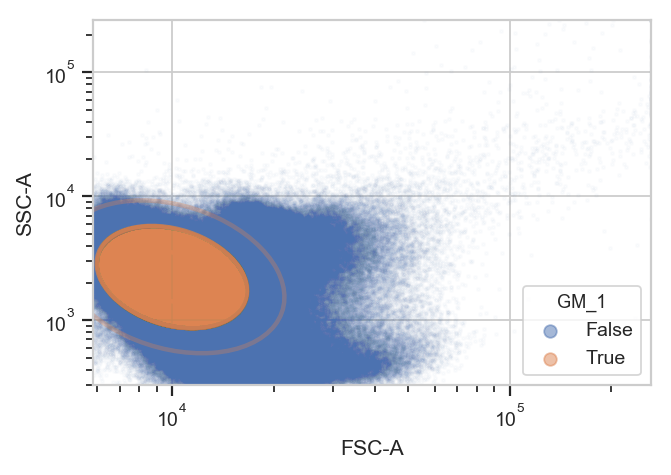

In [10]:
gm = flow.GaussianMixtureOp(name = "GM",
                            channels = ['FSC-A', 'SSC-A'],
                            scale = {'FSC-A' : 'log',
                                     'SSC-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm.estimate(ex2)
ex_gm = gm.apply(ex2)
gm.default_view().plot(ex_gm, alpha = 0.02)

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\utility\log_scale.py:117: RuntimeWarning: invalid value encountered in log10
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\gaussian.py:529: RuntimeWarning: invalid value encountered in less_equal
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\cytoflow\operations\base_op_views.py:342: CytoflowViewWarning: Setting 'huefacet' to 'GM3_1'


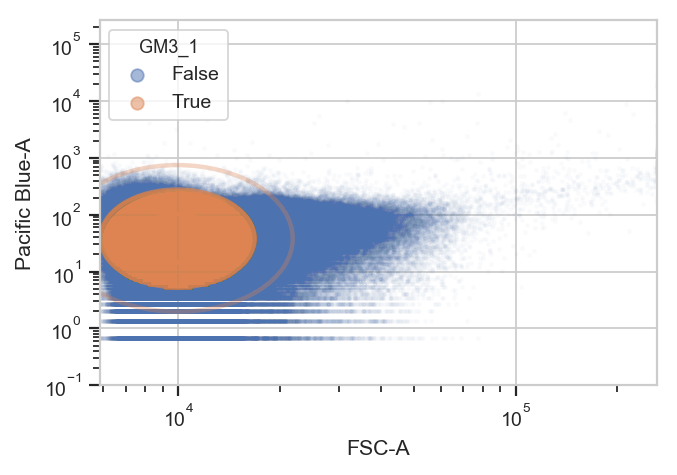

In [11]:
gm3 = flow.GaussianMixtureOp(name = "GM3",
                            channels = ['FSC-A', 'Pacific Blue-A'],
                            scale = {'FSC-A' : 'log',
                                     'Pacific Blue-A' : 'log'},
                            num_components = 1,
                            sigma = 2)
gm3.estimate(ex_gm)
ex_gm2 = gm3.apply(ex_gm)
gm3.default_view().plot(ex_gm2, alpha = 0.02)

In [12]:
df =ex_gm2.data

take the stuff from cytoflow and changing it to datatframe

# filter out events that don't fall within the gates

In [13]:

df = df[(df.GM_1==True) & (df.GM3_1==True) & (df.Range2D==True) & (df['FITC-A'] >0)]
df

,AHL,AmCyan-A,AmCyan-H,AmCyan-W,FITC-A,FITC-H,FITC-W,FSC-A,FSC-H,FSC-W,...,PerCP-Cy5-5-A,PerCP-Cy5-5-H,PerCP-Cy5-5-W,SSC-A,SSC-H,SSC-W,Time,Range2D,GM_1,GM3_1
0,0.0,131.240005,69.0,124651.375000,125.839996,103.0,80068.445312,13861.240234,13715.0,66234.796875,...,9607.839844,10481.0,60076.265625,1672.000000,1751.0,62579.210938,51.299999,True,True,True
4,0.0,61.200001,80.0,50135.039062,73.040001,123.0,38916.667969,14502.180664,14447.0,65786.320312,...,10431.519531,10548.0,64812.292969,1649.119995,1759.0,61442.140625,51.400002,True,True,True
5,0.0,80.919998,56.0,94699.515625,67.760002,90.0,49341.328125,12875.010742,12702.0,66428.656250,...,13306.479492,13372.0,65214.886719,2309.119873,2410.0,62792.730469,51.400002,True,True,True
6,0.0,17.000000,64.0,17408.000000,73.040001,96.0,49861.972656,12527.530273,12724.0,64524.066406,...,7606.719727,7620.0,65421.781250,1327.040039,1296.0,67105.625000,51.400002,True,True,True
7,0.0,-53.040001,64.0,0.000000,8.800000,83.0,6948.395508,12149.390625,12119.0,65700.343750,...,12332.320312,11108.0,72759.359375,2786.080078,2727.0,66955.828125,51.400002,True,True,True
9,0.0,85.000000,100.0,55705.601562,126.720001,65.0,127764.953125,12143.550781,12389.0,64237.609375,...,10604.879883,11200.0,62053.699219,2154.239990,2273.0,62111.867188,51.500000,True,True,True
10,0.0,89.080002,76.0,76815.093750,47.520000,52.0,59889.820312,10668.950195,10752.0,65029.789062,...,12657.919922,11960.0,69360.328125,1701.040039,1680.0,66356.765625,51.500000,True,True,True
16,0.0,-8.840000,75.0,0.000000,31.680000,35.0,59319.445312,12666.959961,12522.0,66294.671875,...,10526.559570,10931.0,63111.210938,1546.160034,1520.0,66663.914062,51.900002,True,True,True
17,0.0,45.560001,45.0,66351.562500,43.119999,110.0,25690.111328,9070.980469,8890.0,66870.171875,...,7615.520020,8729.0,57176.160156,1073.599976,1098.0,64079.648438,52.000000,True,True,True
22,0.0,114.919998,93.0,80982.765625,106.479996,126.0,55383.121094,15784.790039,15594.0,66337.820312,...,11532.400391,12233.0,61782.671875,1425.599976,1422.0,65701.914062,52.099998,True,True,True


In [14]:
df.columns 



Index(['AHL', 'AmCyan-A', 'AmCyan-H', 'AmCyan-W', 'FITC-A', 'FITC-H', 'FITC-W',
       'FSC-A', 'FSC-H', 'FSC-W', 'Family', 'IPTG', 'Pacific Blue-A',
       'Pacific Blue-H', 'Pacific Blue-W', 'PerCP-Cy5-5-A', 'PerCP-Cy5-5-H',
       'PerCP-Cy5-5-W', 'SSC-A', 'SSC-H', 'SSC-W', 'Time', 'Range2D', 'GM_1',
       'GM3_1'],
      dtype='object')

In [15]:
data = df[['FITC-A','AHL','IPTG','Family']]
data.insert(4,'Replicate',2)
data.to_pickle('../compiled-data/se/tra/TraSE_2.pkl')
#uncomment these when you are ready to save replicates and compile replicate from other runs

In [16]:
# Subtract WT background from samples
data = df[['FITC-A','AHL','IPTG','Family']]
data['FITC-A'] = data['FITC-A'] - data[data.Family=='WT']['FITC-A'].median()
data['FITC-A'] = data[data['FITC-A'] > 0]['FITC-A']
data = data[data.Family=='TraR']
data.drop('Family',inplace=True,axis=1)

C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Jonathan\anaconda3\envs\cf2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
data['FITC-A'].min()

0.8800048828125

In [18]:
data

,FITC-A,AHL,IPTG
100000,188.320007,0.0001,0.0
100001,161.919998,0.0001,0.0
100002,230.559998,0.0001,0.0
100003,256.079987,0.0001,0.0
100004,2755.279877,0.0001,0.0
100005,266.640015,0.0001,0.0
100008,184.799988,0.0001,0.0
100009,415.360016,0.0001,0.0
100012,114.400009,0.0001,0.0
100013,325.600006,0.0001,0.0


# Plot median FITC-A

use median or geometeric mean 

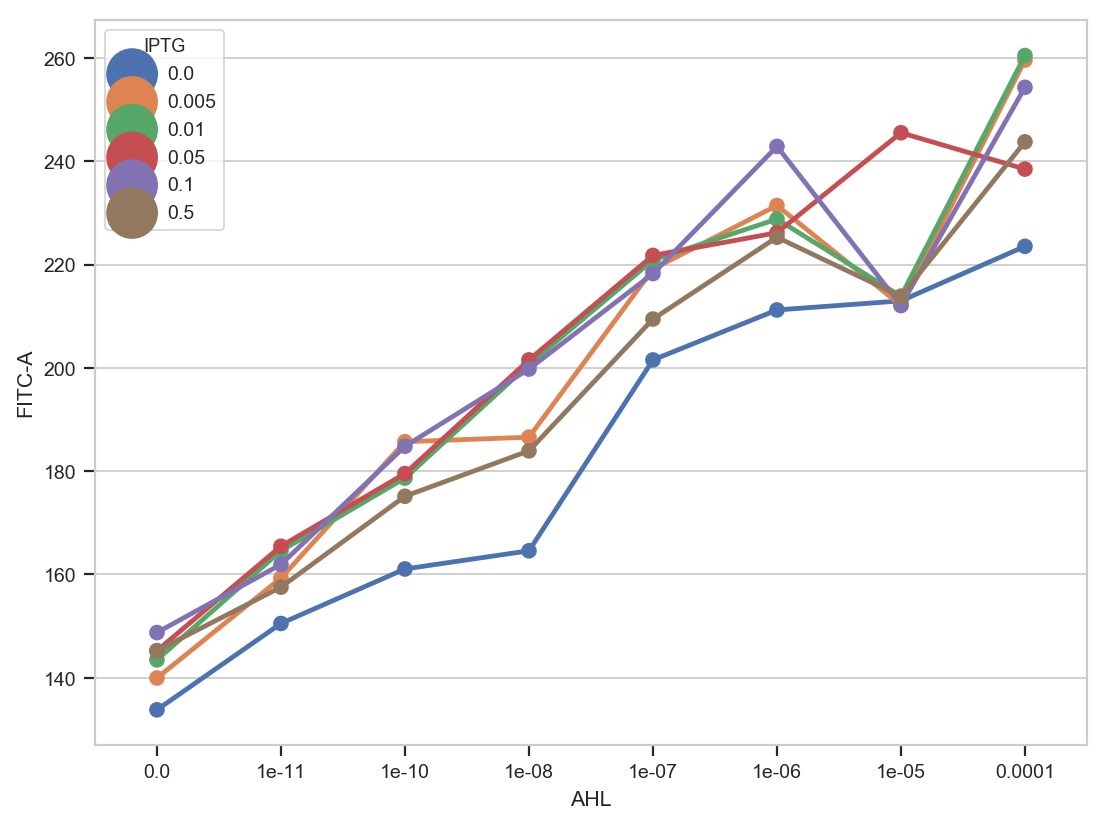

In [19]:
mfi = data.groupby(['AHL','IPTG'])['FITC-A'].median().reset_index()

f, ax = plt.subplots(figsize=(8,6))
sns.pointplot(x='AHL',y='FITC-A',hue='IPTG',data=mfi)
f.savefig('Tra.png',dpi=600)

# Plot heatmaps showing absolute and relative induction

Raw signal 

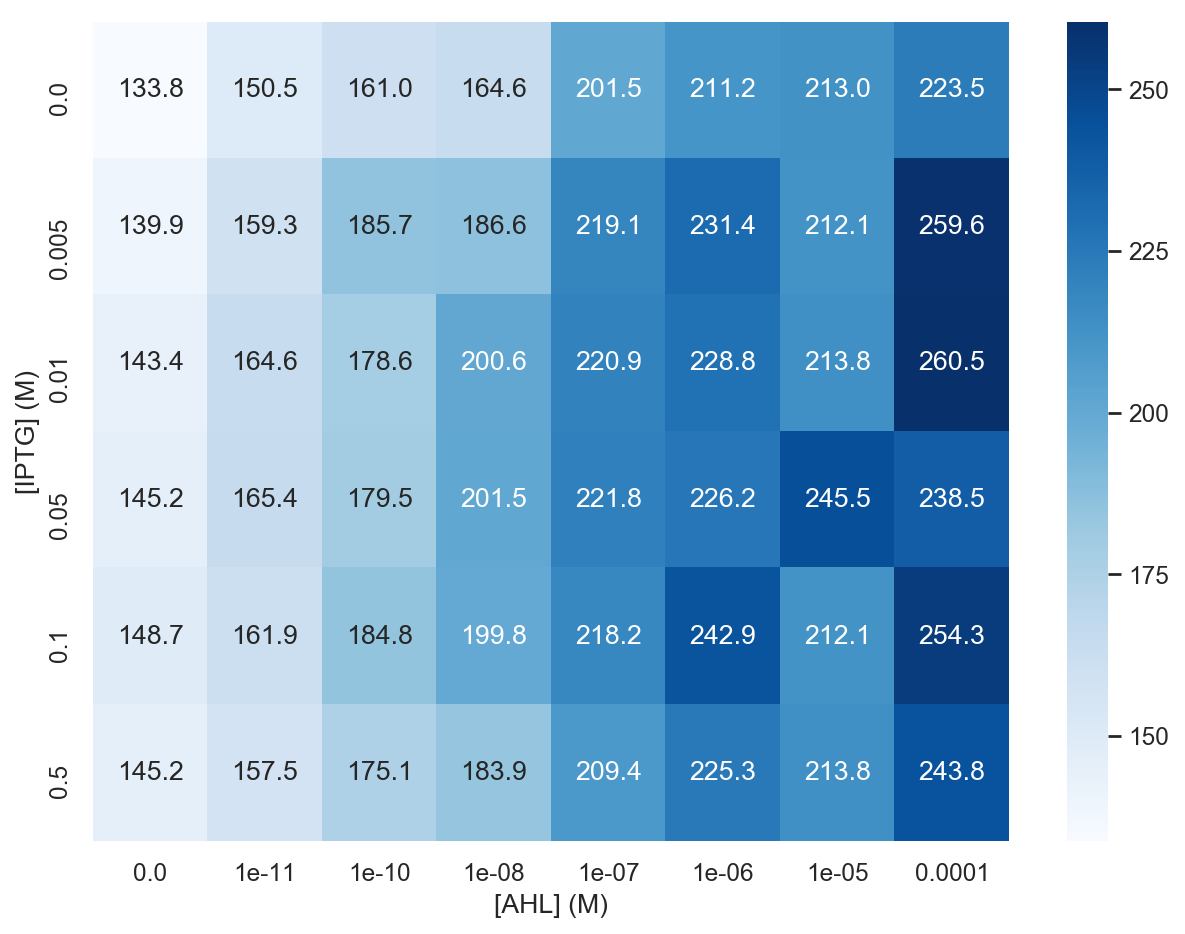

In [20]:
#LasMeans = Las.groupby(['C_ahl','C_iptg']).mean().reset_index()
sns.set(style="white")
#sns.set_style('Talk')
#LasTable = pd.pivot_table(LasMeans,values='FITC-A',index='C_iptg',columns='C_ahl')
f, ax = plt.subplots(figsize=(8,6))
#g = sns.heatmap(LasTable,vmin=0,vmax=100,xticklabels=[0,1e-10,1e-9,1e-7],yticklabels=[0,1e-3,1e-4,1e-5],ax=ax,square=True,cmap='Reds')



#f.savefig('LasHeatmap.png',dpi=600)

#mean['FITC-A']=mean['FITC-A']/mean['FITC-A'].max()*100

piv = mfi.pivot_table(index='IPTG', columns='AHL', values='FITC-A')
g = sns.heatmap(piv, annot=True, fmt=".1f",cmap='Blues')
cbar = g.collections[0].colorbar
#cbar.set_ticks([0, 25, 50, 75,100])
#cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xlabel(r'[AHL] (M)')
ax.set_ylabel(r'[IPTG] (M)')
f.tight_layout()

Normalized to highest signal 

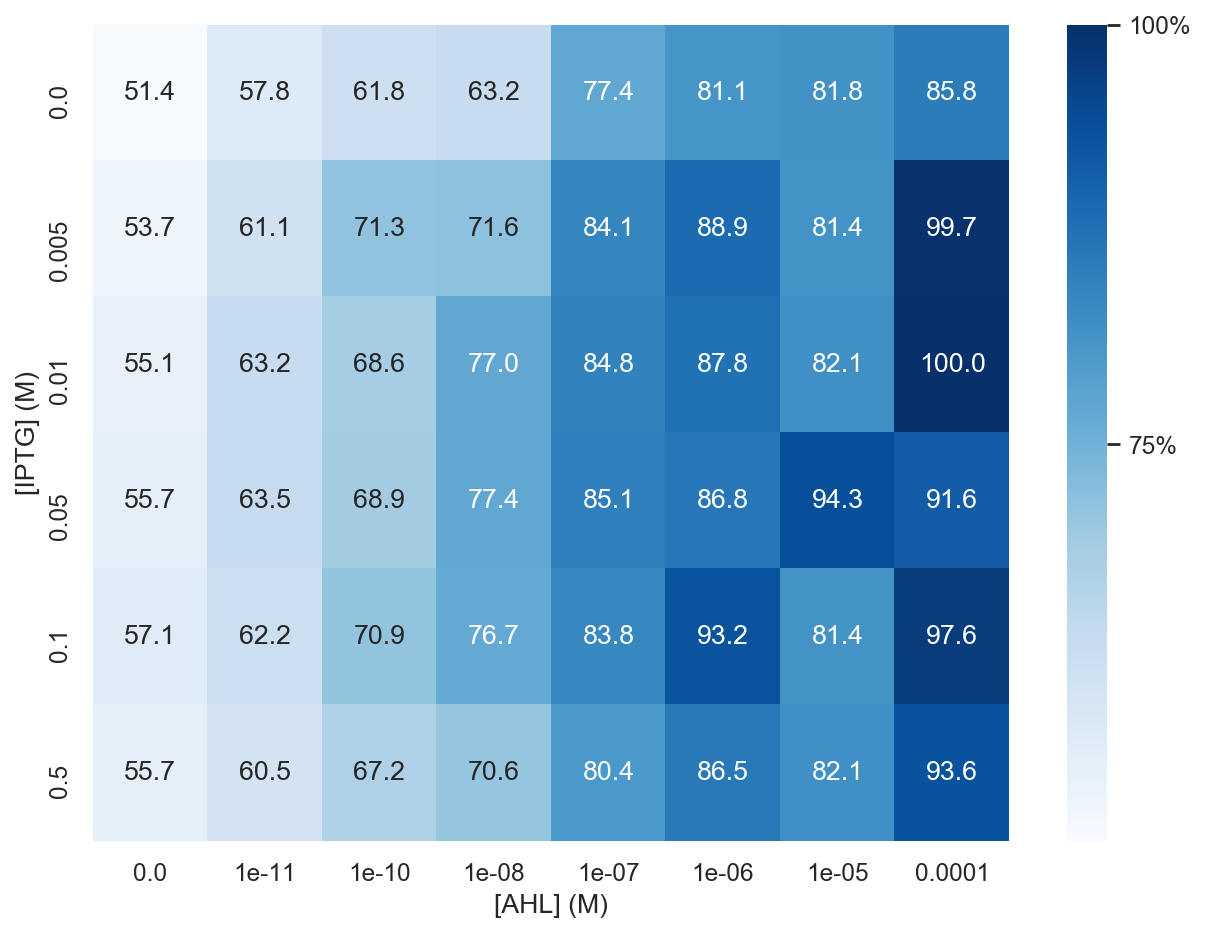

In [21]:
f, ax = plt.subplots(figsize=(8,6))
# normalized
norm = mfi.copy()
norm['FITC-A']=norm['FITC-A']/norm['FITC-A'].max()*100

piv = norm.pivot_table(index='IPTG', columns='AHL', values='FITC-A')
g = sns.heatmap(piv, annot=True, fmt=".1f",cmap='Blues')
cbar = g.collections[0].colorbar
cbar.set_ticks([0, 25, 50, 75,100])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
ax.set_xlabel(r'[AHL] (M)')
ax.set_ylabel(r'[IPTG] (M)')
f.tight_layout()

# Calculate the on/off ratio and plot

In [22]:

R =[]
for i in mfi.IPTG.unique():
    tmp = mfi[mfi.IPTG ==i]['FITC-A'].max()/mfi[mfi.IPTG ==i]['FITC-A'].min()
    R.append([i,tmp])



In [23]:

R = pd.DataFrame(R,columns=['IPTG','Induction Ratio'])
R

,IPTG,Induction Ratio
0,0.000,1.671052
1,0.005,1.855346
2,0.010,1.815951
3,0.050,1.690909
4,0.100,1.710059
5,0.500,1.678788


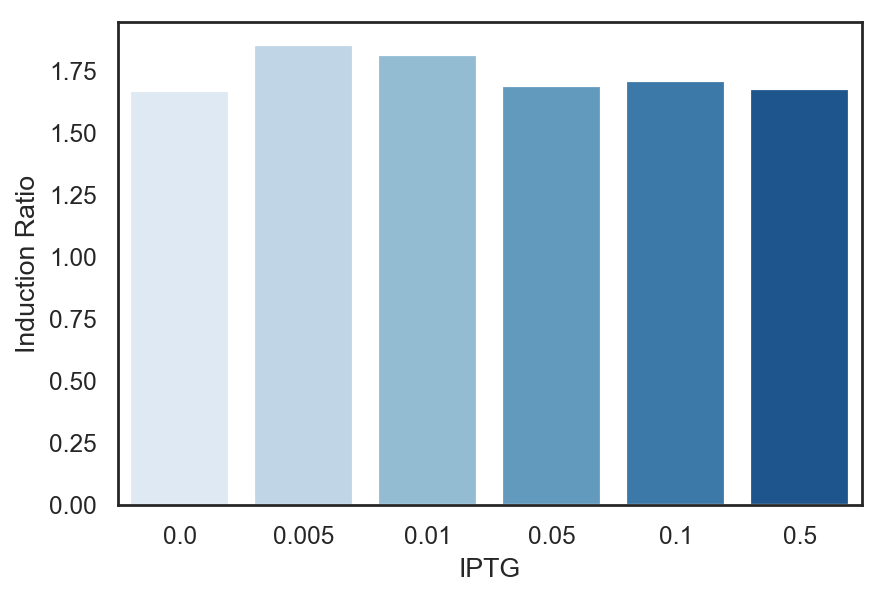

In [24]:
f, ax  = plt.subplots()
sns.barplot(x='IPTG',y='Induction Ratio',data=R,palette='Blues')

STOP HERE